In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from models import MLP
from datasets import load_from_folder, one_hot_encode
from sklearn.datasets import make_classification
np.random.seed(69)

In [2]:
path = './flowers/'
width = 240
height = 320

In [3]:
(train_data, train_label), (test_data, test_label) = load_from_folder(path, test_split=0.2, target_size=(width, height))

train_data = train_data.reshape(-1, height*width)
test_data = test_data.reshape(-1, height*width)

test_label = one_hot_encode(test_label)
train_label = one_hot_encode(train_label)

In [7]:
model = MLP(height*width, 3)
history = model.train(train_data, train_label, return_logs=True, epochs=100)

epoch 1/100: loss: 7.271580803046984; acc: 0.3416666666666667
epoch 2/100: loss: 6.848433781241476; acc: 0.3333333333333333
epoch 3/100: loss: 6.96273986722627; acc: 0.3333333333333333
epoch 4/100: loss: 6.941374929370615; acc: 0.3333333333333333
epoch 5/100: loss: 6.906504727310259; acc: 0.3333333333333333
epoch 6/100: loss: 6.87042894057409; acc: 0.3333333333333333
epoch 7/100: loss: 6.834394333652201; acc: 0.3333333333333333
epoch 8/100: loss: 6.798543185079783; acc: 0.3333333333333333
epoch 9/100: loss: 6.7629089809896525; acc: 0.3333333333333333
epoch 10/100: loss: 6.727516110768042; acc: 0.3333333333333333
epoch 11/100: loss: 6.692389936927139; acc: 0.3333333333333333
epoch 12/100: loss: 6.657557890003435; acc: 0.3333333333333333
epoch 13/100: loss: 6.623049649975014; acc: 0.3333333333333333
epoch 14/100: loss: 6.588897214770768; acc: 0.3333333333333333
epoch 15/100: loss: 6.5551349294237715; acc: 0.3333333333333333
epoch 16/100: loss: 6.521799475973522; acc: 0.3333333333333333
e

[]

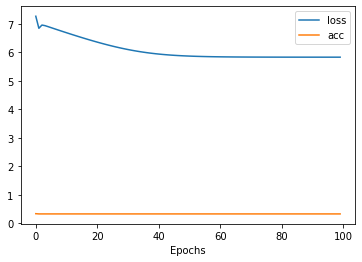

In [8]:
plt.plot(history['loss'], label='loss')
plt.plot(history['acc'], label='acc')
plt.xlabel("Epochs")
plt.legend()
plt.plot()